# **Prediction Using Unsupervised ML K Means Clustering Cryptocurrency Dataset (Predict Names)**


The provided Jupyter Notebook applies K-Means clustering, an unsupervised machine learning algorithm, to a cryptocurrency dataset to identify patterns and group similar cryptocurrencies. This technique helps in categorizing assets based on performance and other attributes without prior labeling.

In [ ]:
# importing some lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snes

In [ ]:
data = pd.read_csv("/content/bitcoin.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2010-07-18,0.0,0.1,0.1,0.1,75,USD
1,2010-07-19,0.1,0.1,0.1,0.1,574,USD
2,2010-07-20,0.1,0.1,0.1,0.1,262,USD
3,2010-07-21,0.1,0.1,0.1,0.1,575,USD
4,2010-07-22,0.1,0.1,0.1,0.1,2160,USD


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Currency,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4420 non-null   object 
 1   Open      4420 non-null   float64
 2   High      4420 non-null   float64
 3   Low       4420 non-null   float64
 4   Close     4420 non-null   float64
 5   Volume    4420 non-null   int64  
 6   Currency  4420 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 241.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,4420.000000,4420.000000,4420.000000,4420.000000,4.420000e+03
mean,8302.221855,8531.971380,8043.473869,8306.969457,1.395788e+07
std,14598.398937,14992.605971,14146.499234,14599.046649,1.645973e+08
min,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,122.500000,129.975000,118.300000,122.800000,3.013600e+04
50%,683.600000,706.500000,657.550000,685.000000,6.762050e+04
75%,8877.250000,9122.700000,8666.900000,8886.075000,1.769402e+05
max,67528.700000,68990.600000,66334.900000,67527.900000,4.468697e+09


In [ ]:
df.nunique()

,0
Date,4420
Open,3462
High,3453
Low,3463
Close,3469
Volume,4369
Currency,1


In [ ]:
# dropping unnessary columns

In [ ]:

df = df.drop(columns=['Currency'])

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2010-07-18,0.0,0.1,0.1,0.1,75
1,2010-07-19,0.1,0.1,0.1,0.1,574
2,2010-07-20,0.1,0.1,0.1,0.1,262
3,2010-07-21,0.1,0.1,0.1,0.1,575
4,2010-07-22,0.1,0.1,0.1,0.1,2160
...,...,...,...,...,...,...
4415,2022-08-19,23201.6,23202.3,20807.8,20831.3,339472
4416,2022-08-20,20830.7,21357.4,20784.8,21138.9,206943
4417,2022-08-21,21138.9,21692.4,21077.4,21517.2,177522
4418,2022-08-22,21516.8,21517.4,20912.1,21416.3,251833


In [ ]:
#convertion of time

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_numeric(df['Date'])

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,1279411200000000000,0.0,0.1,0.1,0.1,75
1,1279497600000000000,0.1,0.1,0.1,0.1,574
2,1279584000000000000,0.1,0.1,0.1,0.1,262
3,1279670400000000000,0.1,0.1,0.1,0.1,575
4,1279756800000000000,0.1,0.1,0.1,0.1,2160
...,...,...,...,...,...,...
4415,1660867200000000000,23201.6,23202.3,20807.8,20831.3,339472
4416,1660953600000000000,20830.7,21357.4,20784.8,21138.9,206943
4417,1661040000000000000,21138.9,21692.4,21077.4,21517.2,177522
4418,1661126400000000000,21516.8,21517.4,20912.1,21416.3,251833


# Unsuppervised Machine Learning
here we will be using Algorithm of K-Mean
K-Means Clustering is an unsupervised machine learning algorithm used to group similar data points into K clusters based on feature similarity. It is widely used in pattern recognition, segmentation, and anomaly detection.



In [ ]:
# importing some important files
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


wcss = []
for k in range(1, 11):  # Testing K from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)




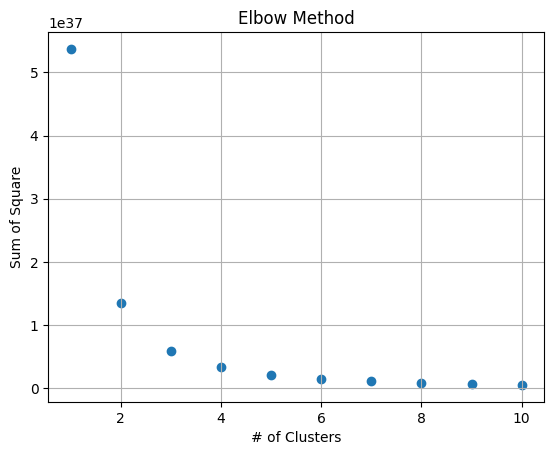

In [ ]:
plt.scatter(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Square')
plt.grid()
plt.show()

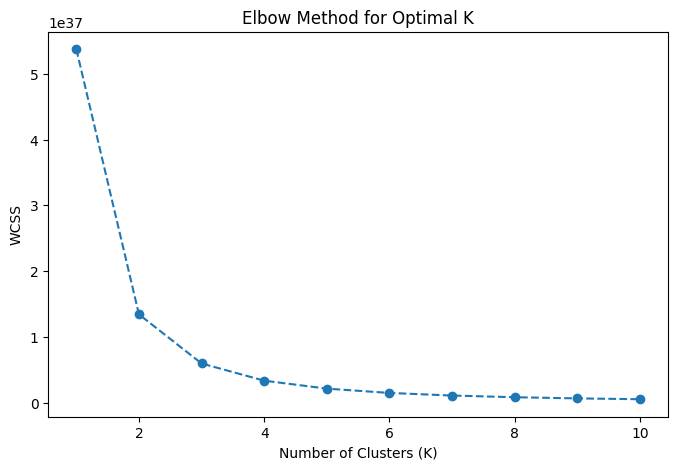

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss,marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

The best K value to decide is where it stops to decrease rapidly and the best walue here is K = 3  

# Prediction

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

In [ ]:
x = df.values
x

array([[1.2794112e+18, 0.0000000e+00, 1.0000000e-01, 1.0000000e-01,
        1.0000000e-01, 7.5000000e+01],
       [1.2794976e+18, 1.0000000e-01, 1.0000000e-01, 1.0000000e-01,
        1.0000000e-01, 5.7400000e+02],
       [1.2795840e+18, 1.0000000e-01, 1.0000000e-01, 1.0000000e-01,
        1.0000000e-01, 2.6200000e+02],
       ...,
       [1.6610400e+18, 2.1138900e+04, 2.1692400e+04, 2.1077400e+04,
        2.1517200e+04, 1.7752200e+05],
       [1.6611264e+18, 2.1516800e+04, 2.1517400e+04, 2.0912100e+04,
        2.1416300e+04, 2.5183300e+05],
       [1.6612128e+18, 2.1416500e+04, 2.1458200e+04, 2.1271200e+04,
        2.1309000e+04, 2.5169500e+05]])

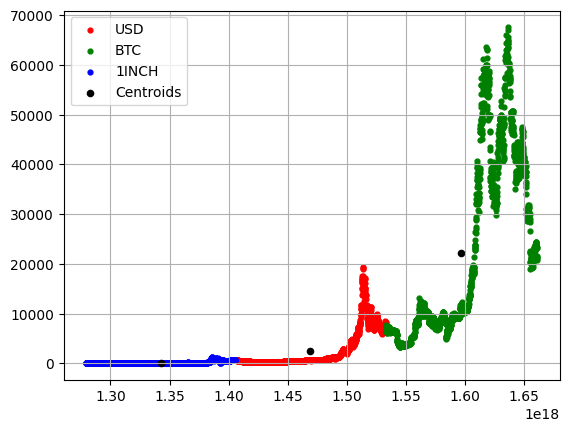

In [ ]:
plt.scatter(x[clusters==0,0], x[clusters==0,1], s=12, c='red', label='USD')
plt.scatter(x[clusters==1,0], x[clusters==1,1], s=12, c='green', label='BTC')
plt.scatter(x[clusters==2,0], x[clusters==2,1], s=12, c='blue', label='1INCH')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

# Accuracy

Silhouette Score	Interpretation

0.7 - 1.0	Excellent clustering ✅

0.5 - 0.7	Good clustering 👍

0.3 - 0.5	Moderate, needs improvement ⚠

0.0 - 0.3	Weak clustering, poor separation ❌

Negative	Completely wrong clustering ❌

✔ If silhouette_avg > 0.5, your clustering is good!
❌ If silhouette_avg < 0.3, you might need to adjust K or preprocess the data better.

In [ ]:

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.5899
